In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.patches as mpatches

In [2]:
sources = pd.read_csv('/home/machado.35/projects/intro/scripts/sources.csv')
sources = list(sources['sources'])

res_list = [60,90,120,150]
fp = '/data/rubin/machado.35/phangs/rand_results/1e6/'

Text(0.5, 0, 'Distance to Nearest Neighbor (pc)')

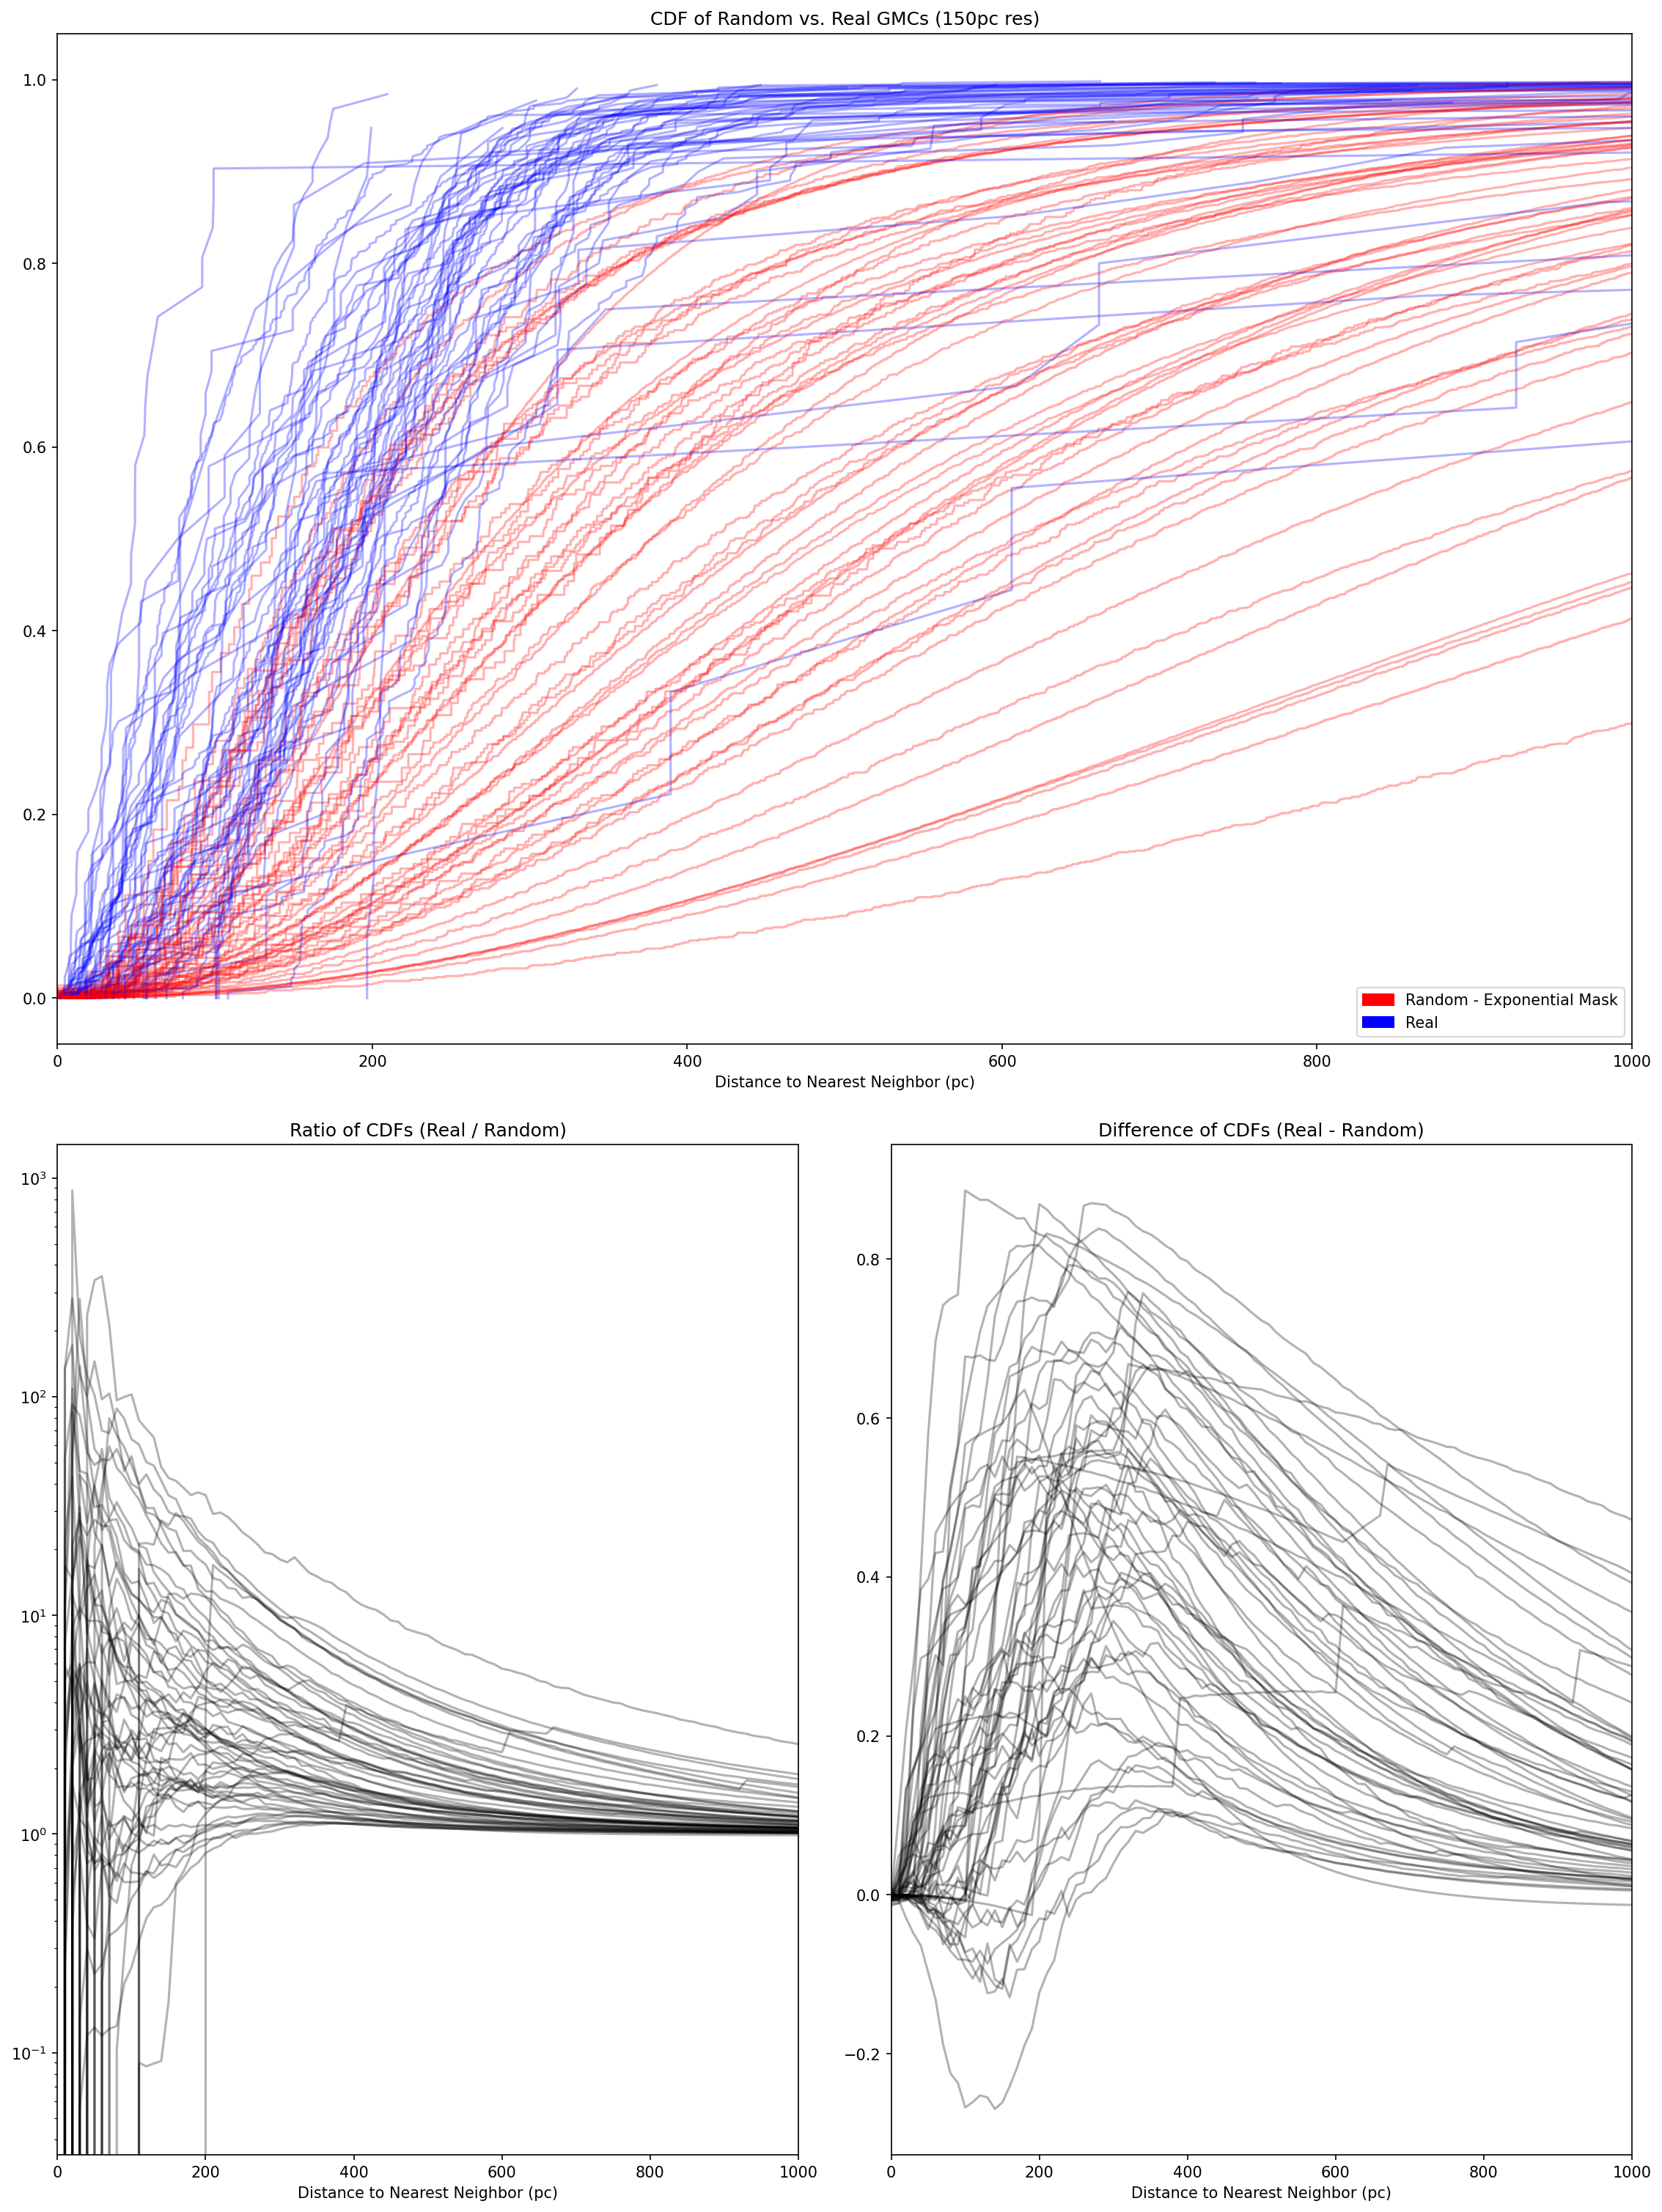

In [13]:
bins = np.linspace(0,1000,51)
#fig, ax=plt.subplots(1,3, figsize=(24,5), dpi=150)
ax = plt.figure(dpi=150, figsize=(15,20), constrained_layout=True).subplot_mosaic(
    """
    AA
    BC
    """
)
res = 150

for i in range(len(sources)):
    real_data = '/home/machado.35/projects/intro/sources/'+sources[i]+'/'+sources[i]+'_'+str(res)+'pc_cloud_stats.csv'
    rand_2d = fp+sources[i]+'_2dcov'+'_'+str(res)+'pc.csv'
    rand_exp = fp+sources[i]+'_exp'+'_'+str(res)+'pc.csv'
    if os.path.isfile(real_data) and os.path.isfile(rand_2d):
        real_data = pd.read_csv(real_data)['min_dist']
        rand_2d = pd.read_csv(rand_2d)['nn_dist']
        rand_exp = pd.read_csv(rand_exp)['nn_dist']

        #Exponential CDF
        exp_sort = np.sort(rand_exp)
        exp_cdf = np.arange(len(rand_exp))/ float(len(rand_exp))
        ax['A'].plot(exp_sort, exp_cdf, c='r', alpha=0.3)

        #2D Coverage CDF
        #cov_sort = np.sort(rand_2d)
        #cov_cdf = np.arange(len(rand_2d))/float(len(rand_2d))
        #plt.plot(cov_sort, cov_cdf, c='black', alpha=0.3)

        #Real Data CDF
        real_sort = np.sort(real_data)
        real_cdf = np.arange(len(real_data))/float(len(real_data))
        ax['A'].plot(real_sort, real_cdf, c='b', alpha=0.3)
        #plt.plot(real_sort/exp_sort, real_cdf/exp_cdf, c='b', alpha=0.3)
        
        #del real_data, rand_2d, rand_exp, exp_sort, exp_cdf, cov_sort, cov_cdf

        #PLOT RATIO OF CDFS
        xvals = np.linspace(0,2000,201)
        real_gridded = np.interp(xvals, real_sort, real_cdf)
        exp_gridded = np.interp(xvals, exp_sort, exp_cdf)
        ax['B'].plot(xvals, real_gridded/exp_gridded, c='black', alpha=0.3)
        
        
        #PLOT DIFFERENCE IN CDFS
        ax['C'].plot(xvals, real_gridded-exp_gridded, c='black', alpha=0.3)

        
        
red_patch = mpatches.Patch(color='red', label='Random - Exponential Mask')
blue_patch = mpatches.Patch(color='blue', label='Real')
ax['A'].legend(handles=[red_patch, blue_patch], loc='lower right')
ax['A'].title.set_text('CDF of Random vs. Real GMCs ('+str(res)+'pc res)')
ax['A'].set_xlim(0,1000)
ax['A'].set_xlabel('Distance to Nearest Neighbor (pc)')

ax['B'].title.set_text('Ratio of CDFs (Real / Random)')
ax['B'].set_xlim(0,1000)
ax['B'].set_yscale('log')
ax['B'].set_xlabel('Distance to Nearest Neighbor (pc)')

ax['C'].title.set_text('Difference of CDFs (Real - Random)')
ax['C'].set_xlim(0,1000)
ax['C'].set_xlabel('Distance to Nearest Neighbor (pc)')

In [6]:
real_sort

array([  30.64646198,   30.64646198,   35.40404318,   35.40404318,
         40.81818749,   40.81818749,   44.73670269,   44.73670269,
         48.31966335,   48.31966335,   49.31073705,   49.31073705,
         55.44464322,   55.44464322,   55.84169749,   77.06541333,
         77.06541333,   88.63236   ,   88.63236   ,   96.45964307,
         96.45964307,  106.26212846,  106.4981288 ,  106.4981288 ,
        110.56302939,  115.75959593,  115.75959593,  126.54130779,
        132.3331201 ,  132.3331201 ,  144.09571912,  144.09571912,
        154.05610581,  154.05610581,  154.51864123,  155.78917095,
        157.65019788,  162.388354  ,  165.64239278,  165.64239278,
        169.52381553,  173.3551885 ,  173.3551885 ,  174.36407908,
        176.27496257,  176.27496257,  189.74034722,  189.74034722,
        214.66337793,  216.31600256,  228.06301317,  228.06301317,
        235.69251872,  238.77685812,  238.77685812,  243.17777522,
        247.60449853,  248.77880141,  256.40062232,  261.44705

Text(0.5, 0, 'Distance to Nearest Neighbor (pc)')

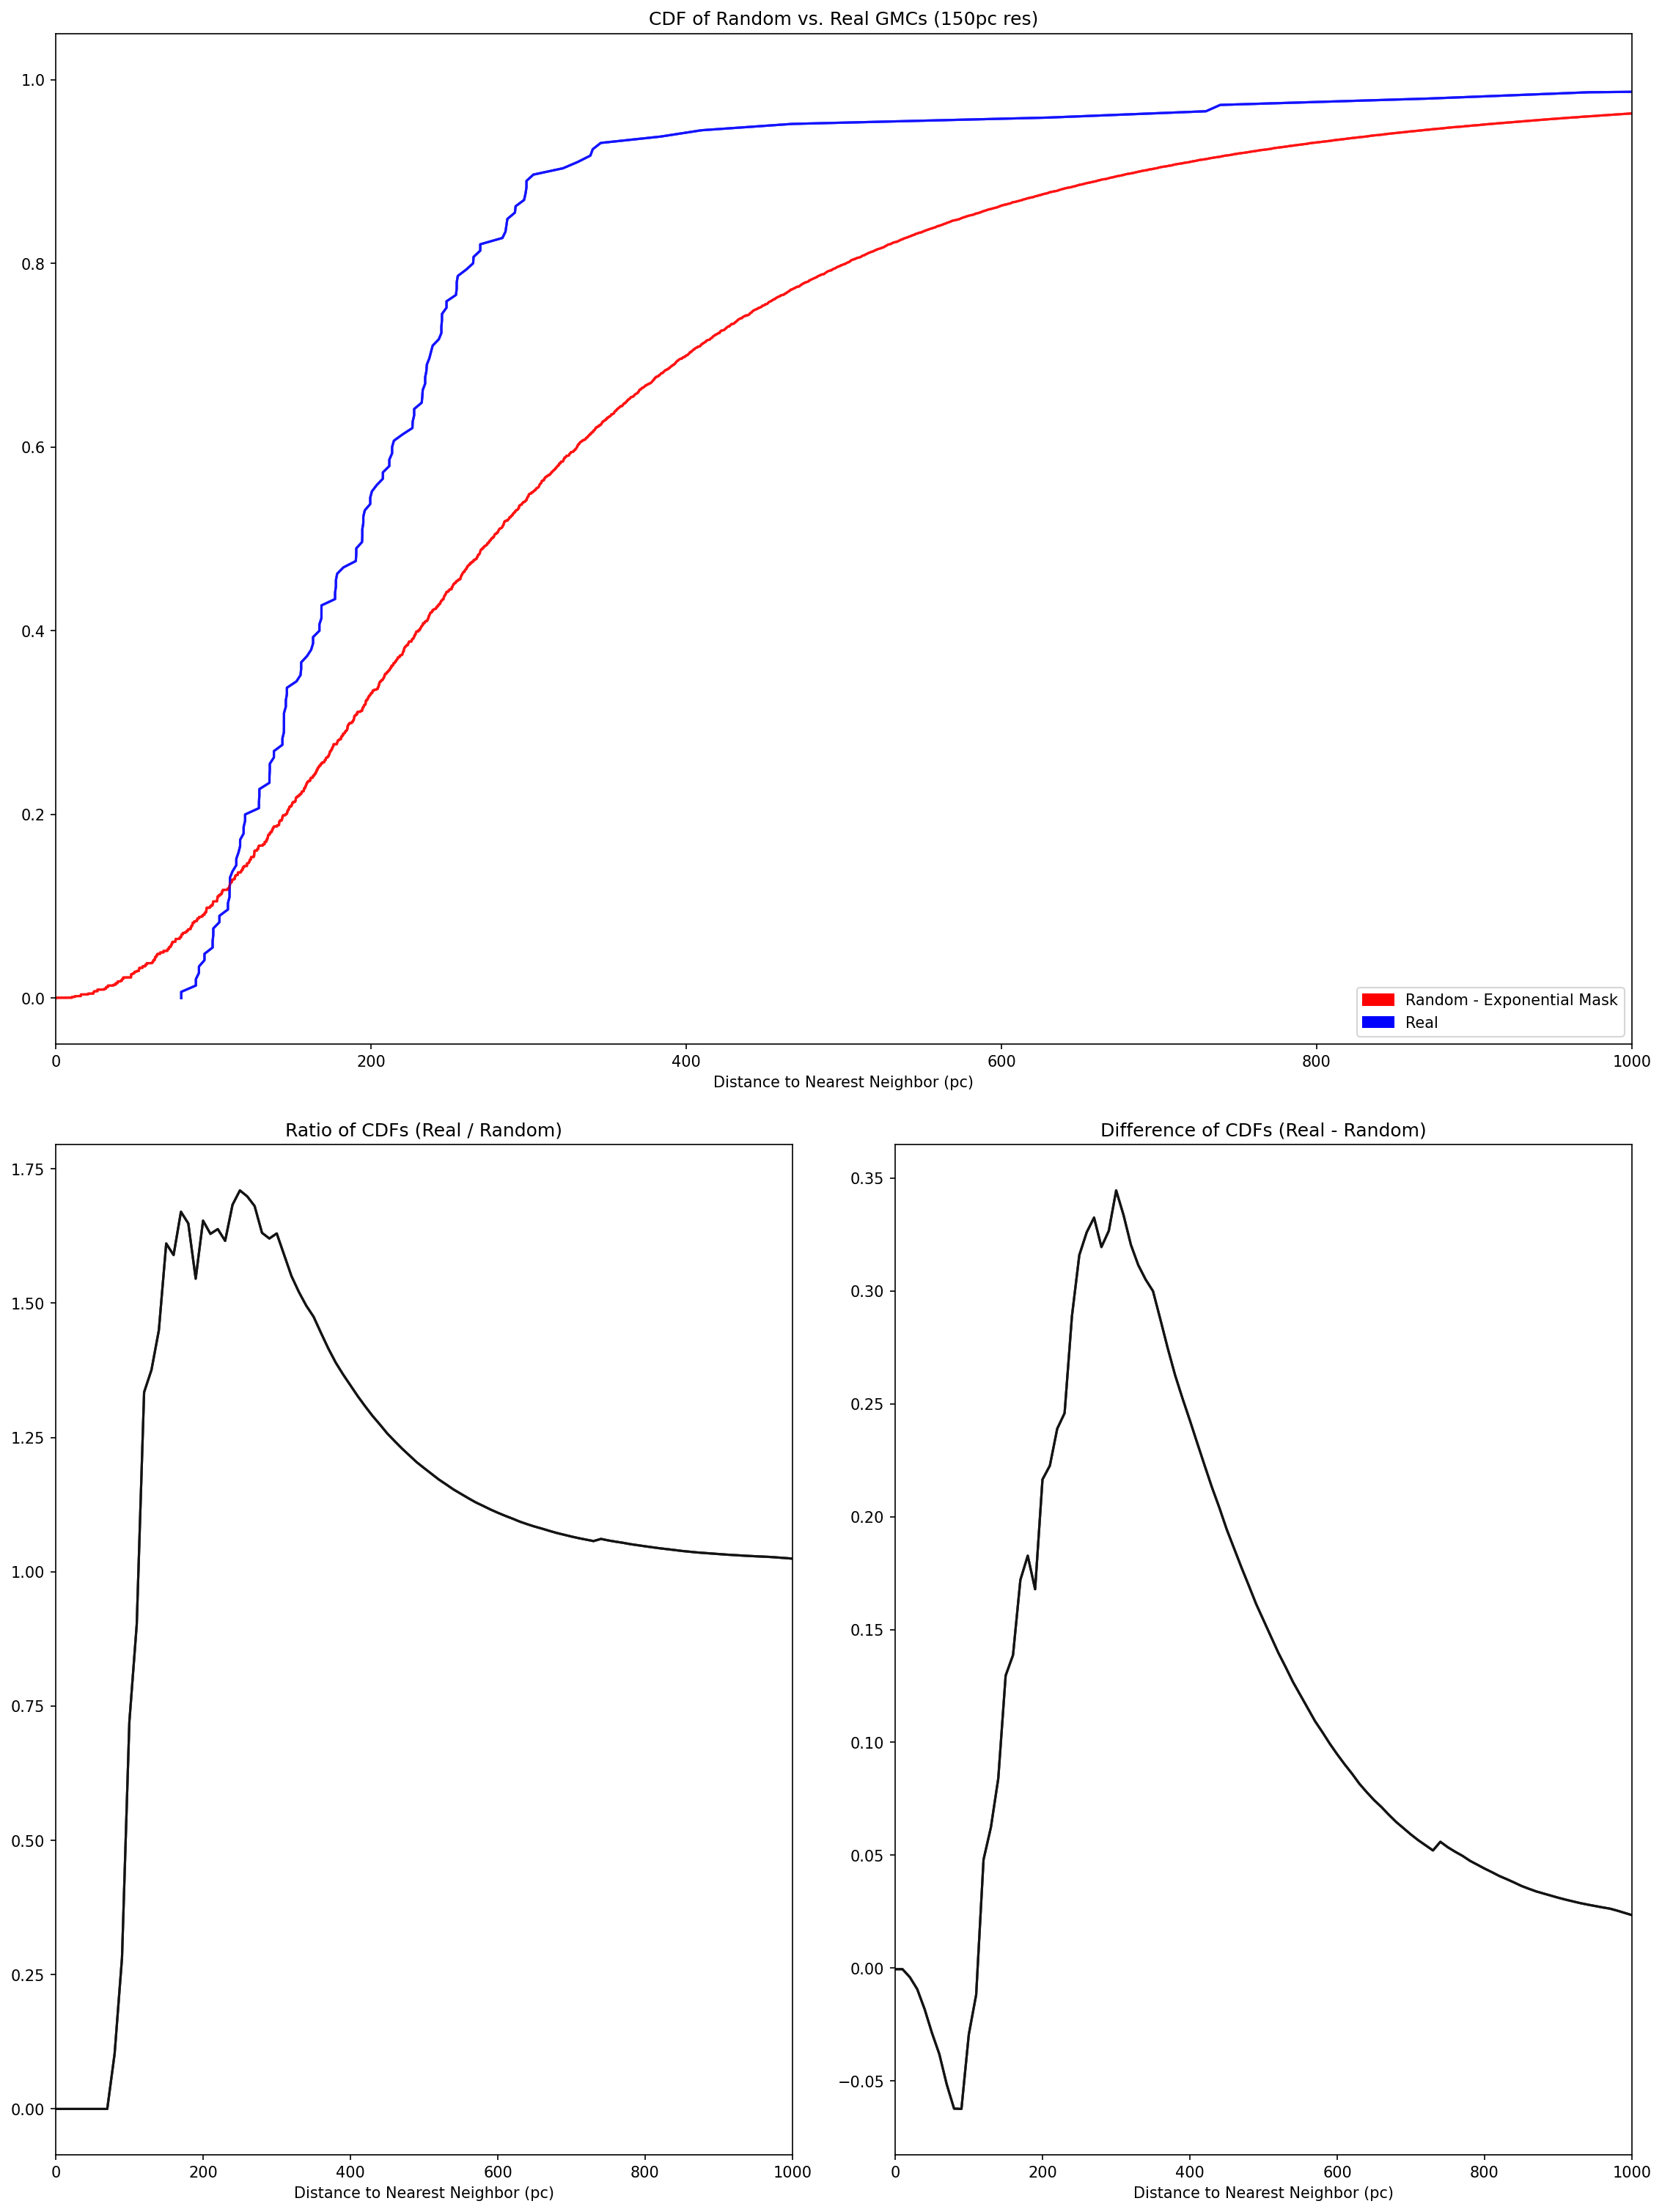

In [3]:
#fig, ax=plt.subplots(1,3, figsize=(24,5), dpi=150)
ax = plt.figure(dpi=150, figsize=(15,20), constrained_layout=True).subplot_mosaic(
    """
    AA
    BC
    """
)
res = 150
source = sources[32]
for i in range(len(source)):
    i=32
    real_data = '/home/machado.35/projects/intro/sources/'+sources[i]+'/'+sources[i]+'_'+str(res)+'pc_cloud_stats.csv'
    rand_2d = fp+sources[i]+'_2dcov'+'_'+str(res)+'pc.csv'
    rand_exp = fp+sources[i]+'_exp'+'_'+str(res)+'pc.csv'
    if os.path.isfile(real_data) and os.path.isfile(rand_2d):
        real_data = pd.read_csv(real_data)['min_dist']
        rand_2d = pd.read_csv(rand_2d)['nn_dist']
        rand_exp = pd.read_csv(rand_exp)['nn_dist']

        #Exponential CDF
        exp_sort = np.sort(rand_exp)
        exp_cdf = np.arange(len(rand_exp))/ float(len(rand_exp))
        ax['A'].plot(exp_sort, exp_cdf, c='r', alpha=0.3)

        #2D Coverage CDF
        #cov_sort = np.sort(rand_2d)
        #cov_cdf = np.arange(len(rand_2d))/float(len(rand_2d))
        #plt.plot(cov_sort, cov_cdf, c='black', alpha=0.3)

        #Real Data CDF
        real_sort = np.sort(real_data)
        real_cdf = np.arange(len(real_data))/float(len(real_data))
        ax['A'].plot(real_sort, real_cdf, c='b', alpha=0.3)
        #plt.plot(real_sort/exp_sort, real_cdf/exp_cdf, c='b', alpha=0.3)
        
        #del real_data, rand_2d, rand_exp, exp_sort, exp_cdf, cov_sort, cov_cdf

        #PLOT RATIO OF CDFS
        xvals = np.linspace(0,2000,201)
        real_gridded = np.interp(xvals, real_sort, real_cdf)
        exp_gridded = np.interp(xvals, exp_sort, exp_cdf)
        ax['B'].plot(xvals, real_gridded/exp_gridded, c='black', alpha=0.3)
        
        
        #PLOT DIFFERENCE IN CDFS
        ax['C'].plot(xvals, real_gridded-exp_gridded, c='black', alpha=0.3)
        
red_patch = mpatches.Patch(color='red', label='Random - Exponential Mask')
blue_patch = mpatches.Patch(color='blue', label='Real')
ax['A'].legend(handles=[red_patch, blue_patch], loc='lower right')
ax['A'].title.set_text('CDF of Random vs. Real GMCs ('+str(res)+'pc res)')
ax['A'].set_xlim(0,1000)
ax['A'].set_xlabel('Distance to Nearest Neighbor (pc)')

ax['B'].title.set_text('Ratio of CDFs (Real / Random)')
ax['B'].set_xlim(0,1000)
ax['B'].set_xlabel('Distance to Nearest Neighbor (pc)')

ax['C'].title.set_text('Difference of CDFs (Real - Random)')
ax['C'].set_xlim(0,1000)
ax['C'].set_xlabel('Distance to Nearest Neighbor (pc)')


In [4]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

(0.0, 300.0)

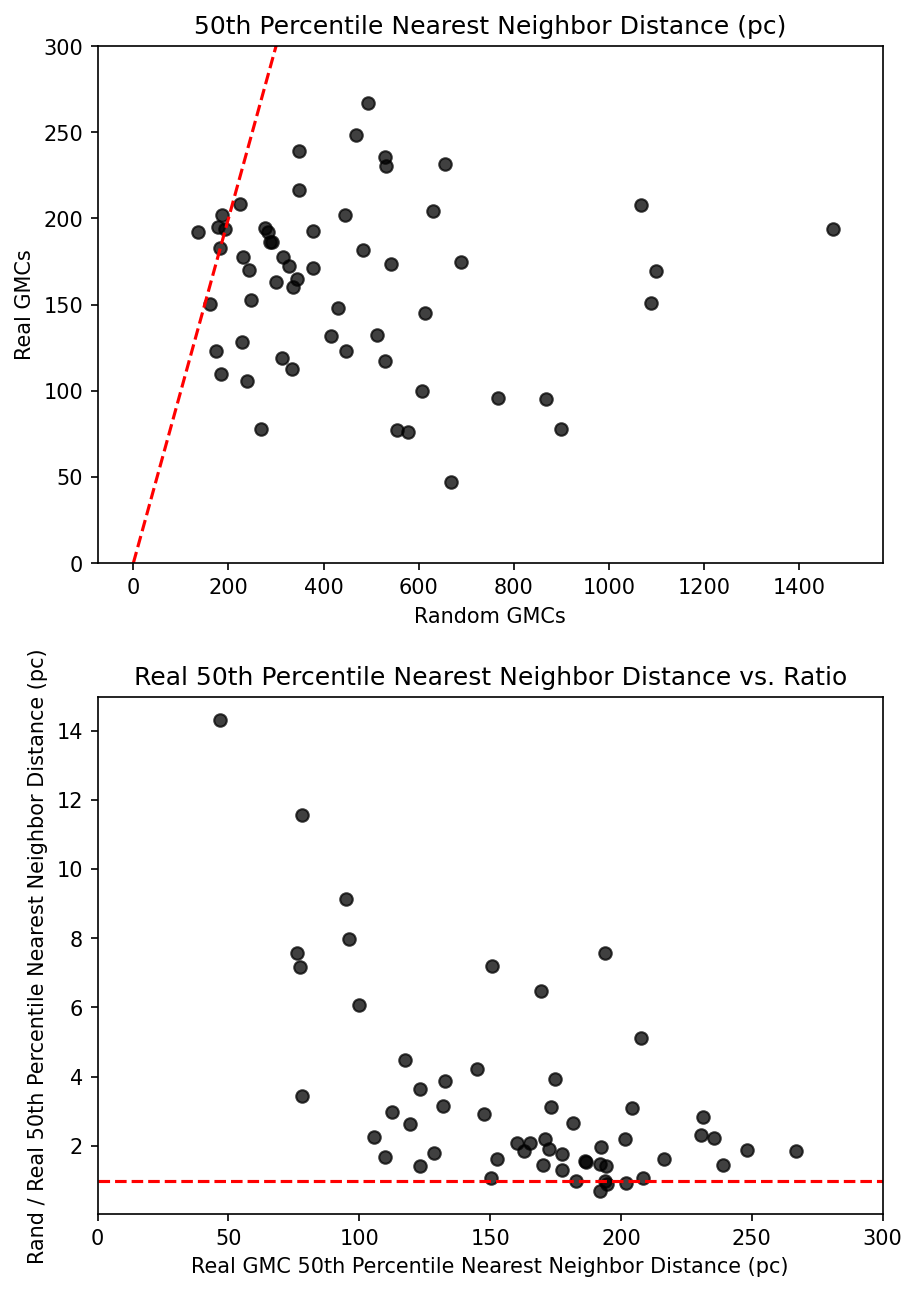

In [21]:
bins = np.linspace(0,1000,51)
ax = plt.figure(dpi=150, figsize=(6,8.5), constrained_layout=True).subplot_mosaic(
    """
    AA
    BB
    """
)
res = 150

for i in range(len(sources)):
    real_data = '/home/machado.35/projects/intro/sources/'+sources[i]+'/'+sources[i]+'_'+str(res)+'pc_cloud_stats.csv'
    rand_2d = fp+sources[i]+'_2dcov'+'_'+str(res)+'pc.csv'
    rand_exp = fp+sources[i]+'_exp'+'_'+str(res)+'pc.csv'
    if os.path.isfile(real_data) and os.path.isfile(rand_2d):
        real_data = pd.read_csv(real_data)['min_dist']
        rand_2d = pd.read_csv(rand_2d)['nn_dist']
        rand_exp = pd.read_csv(rand_exp)['nn_dist']

        #Exponential CDF
        exp_sort = np.sort(rand_exp)
        exp_cdf = np.arange(len(rand_exp))/ float(len(rand_exp))
        mid_ind_exp = np.where(exp_cdf == find_nearest(exp_cdf, 0.5))[0][0]
        exp_mid_val = exp_sort[mid_ind_exp]
        
        
        #Real Data CDF
        real_sort = np.sort(real_data)
        real_cdf = np.arange(len(real_data))/float(len(real_data))
        mid_ind_real = np.where(real_cdf == find_nearest(real_cdf, 0.5))[0][0]
        real_mid_val = real_sort[mid_ind_real]

        #Plot Real 50% dist vs Rand 50% dist
        ax['A'].scatter(exp_mid_val, real_mid_val, c='black', alpha=0.75)
        
        
        #Plot Real 50% dist vs Real 50%/Rand 50%
        ax['B'].scatter(real_mid_val, exp_mid_val/real_mid_val, c='black', alpha=0.75)

ax['A'].set_xlabel('Random GMCs')
ax['A'].set_ylabel('Real GMCs')
ax['A'].set_title('50th Percentile Nearest Neighbor Distance (pc)')
ax['A'].set_ylim(0,300)
ax['A'].plot([0,1500], [0,1500], c='r', ls='--')

ax['B'].set_title('Real 50th Percentile Nearest Neighbor Distance vs. Ratio')
ax['B'].set_xlabel('Real GMC 50th Percentile Nearest Neighbor Distance (pc)')
ax['B'].set_ylabel('Rand / Real 50th Percentile Nearest Neighbor Distance (pc)')
ax['B'].plot([0,750], [1,1], c='r', ls='--')
ax['B'].set_xlim(0,300)

In [18]:
np.where(real_cdf == find_nearest(real_cdf, 0.5))[0][0]

72

In [19]:
real_sort[72]

194.3509445353673